# Numerical experiments: GPQ using PBK on low-order polynomials

This notebook refers to Section 5.2 of the Bachelorthesis.

## Low-order monomial quadrature

We will now integrate low-order monomials $x^t,\;t=0,\ldots,10$ with the Polynomial Basis kernel and GPQ. For the weight we will choose a variety of parameters $b$ and test which parameters $b$ results in the best approximations.

In [1]:
import numpy as np
import scipy as sp
import GPy
import kernels
import functions
from matplotlib import pyplot as plt

In [27]:
b = np.array([0.1, 0.5, 0.9])
number_of_powers = 16
integralvalues = np.zeros((6, number_of_powers + 1, len(b)))
variancevalues = np.zeros((6, number_of_powers + 1, len(b)))
I_exact = np.zeros(number_of_powers + 1)
for k in range(2, 8):
    for i in range(0, len(b)):
        PBK = kernels.PolynomialBasis(input_dim=1, weight=b[i])
        for t in range(0, number_of_powers + 1):
            def func(x):
                return np.power(x, t)
            X = functions.GPQ(f=func, kernel=PBK, A=np.array([-1, 1]), NoN=k, return_var=True)
            integralvalues[k-2][t][i] = X[0]
            variancevalues[k-2][t][i] = X[1]
            if i == 0 and k == 2:
                I_exact[t] = sp.integrate.quad(func, a=-1, b=1, epsabs=1.49e-16)[0]

 C:\Users\Manuel Kleinschmager\Anaconda3\envs\GaussianProcessQuadrature\lib\site-packages\ipykernel_launcher.py:16: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


In [28]:
abs_err = np.zeros((6, number_of_powers + 1, len(b)))
for k in range(2, 8):
    for i in range(0, len(b)):
        for t in range(0, number_of_powers + 1):
            abs_err[k-2][t][i] = np.absolute(integralvalues[k-2][t][i]- I_exact[t])

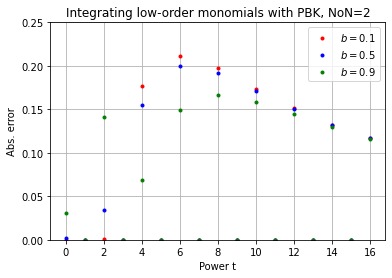

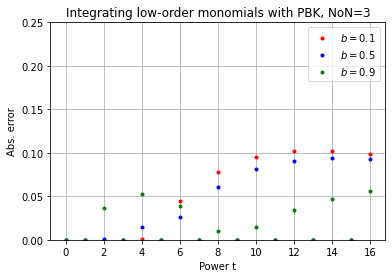

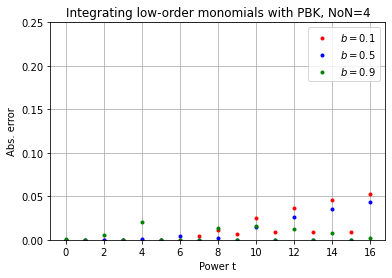

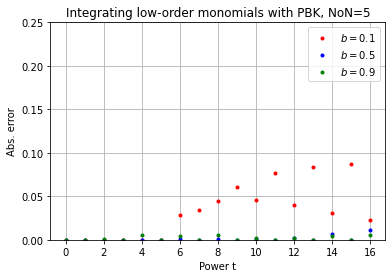

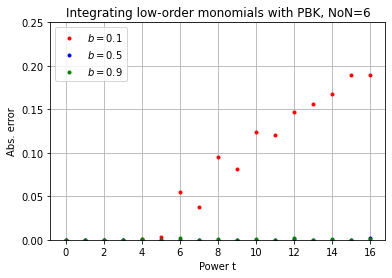

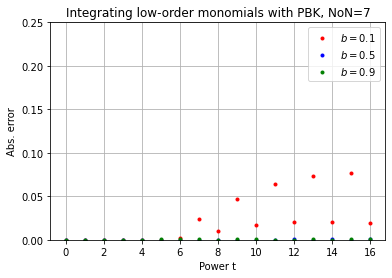

In [30]:
X = np.arange(0, number_of_powers + 1)
for k in range(2, 8):
    plt.figure()
    plt.grid()
    plt.plot(X, abs_err[k-2].T[0], 'r.', label='$b=0.1$')
    plt.plot(X, abs_err[k-2].T[1], 'b.', label='$b=0.5$')
    plt.plot(X, abs_err[k-2].T[2], 'g.', label='$b=0.9$')
    plt.ylim(0, 0.25)
    plt.xlabel('Power t')
    plt.ylabel('Abs. error')
    plt.title('Integrating low-order monomials with PBK, NoN=' + '{}'.format(k))
    plt.legend()
    plt.show()

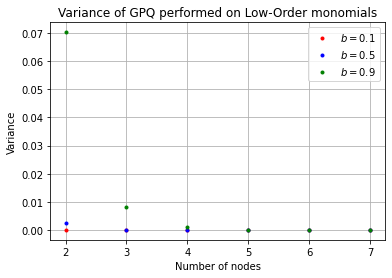

In [86]:
X1 = np.arange(2, 8)
vvalues = np.zeros((3, 6))
for i in range(0, 3):
    for j in range(0, 6):
        vvalues.T[i] = variancevalues[i][j]
plt.figure()
plt.grid()
plt.plot(X1, vvalues[0], 'r.', label='$b=0.1$')
plt.plot(X1, vvalues[1], 'b.', label='$b=0.5$')
plt.plot(X1, vvalues[2], 'g.', label='$b=0.9$')
    
plt.xlabel('Number of nodes')
plt.ylabel('Variance')
plt.title('Variance of GPQ performed on Low-Order monomials')
plt.legend()
plt.show()

In [40]:
np.max(np.absolute(variancevalues))

0.0702982769342313

In [41]:
np.min(np.absolute(variancevalues))

8.337330825725076e-12